In [1]:
import gc
import itertools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import kurtosis, skew

In [2]:
items = pd.read_csv("./items.csv")
shops = pd.read_csv("./shops.csv")
train = pd.read_csv("./sales_train.csv")
test = pd.read_csv("./test.csv")
cat = pd.read_csv("./item_categories.csv")

In [3]:
#공분산과 상관계수
train.corr()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
date_block_num,1.000000,0.019273,0.009356,0.095010,0.009402
shop_id,0.019273,1.000000,0.029396,-0.024034,-0.005230
item_id,0.009356,0.029396,1.000000,-0.134104,0.016650
item_price,0.095010,-0.024034,-0.134104,1.000000,0.011197
item_cnt_day,0.009402,-0.005230,0.016650,0.011197,1.000000


In [4]:
train['income_per_days'] = train.item_cnt_day*train.item_price

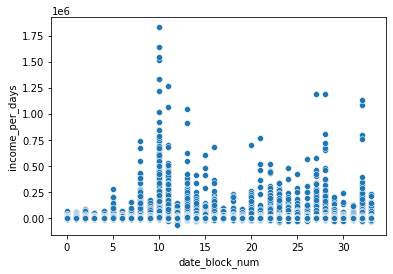

In [5]:
sns.scatterplot(x = "date_block_num", y = "income_per_days", data = train)
plt.show()

In [6]:
train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,income_per_days
0,02.01.2013,0,59,22154,999.00,1.0,999.00
1,03.01.2013,0,25,2552,899.00,1.0,899.00
2,05.01.2013,0,25,2552,899.00,-1.0,-899.00
3,06.01.2013,0,25,2554,1709.05,1.0,1709.05
4,15.01.2013,0,25,2555,1099.00,1.0,1099.00
...,...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0,299.00
2935845,09.10.2015,33,25,7460,299.00,1.0,299.00
2935846,14.10.2015,33,25,7459,349.00,1.0,349.00
2935847,22.10.2015,33,25,7440,299.00,1.0,299.00


In [7]:
train.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,income_per_days
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00,1.157732e+03
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00,5.683604e+03
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01,-6.897000e+04
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00,2.490000e+02
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00,4.490000e+02
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00,1.078200e+03
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03,1.829990e+06


In [8]:
train.describe(include="all")
#숫자형 자료형이 아닌 변수 정보 볼 수 있음

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,income_per_days
count,2935849,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
unique,1034,NaN,NaN,NaN,NaN,NaN,NaN
top,28.12.2013,NaN,NaN,NaN,NaN,NaN,NaN
freq,9434,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00,1.157732e+03
std,NaN,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00,5.683604e+03
min,NaN,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01,-6.897000e+04
25%,NaN,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00,2.490000e+02
50%,NaN,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00,4.490000e+02
75%,NaN,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00,1.078200e+03


In [9]:
train.shape

(2935849, 7)

In [10]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,income_per_days
0,02.01.2013,0,59,22154,999.00,1.0,999.00
1,03.01.2013,0,25,2552,899.00,1.0,899.00
2,05.01.2013,0,25,2552,899.00,-1.0,-899.00
3,06.01.2013,0,25,2554,1709.05,1.0,1709.05
4,15.01.2013,0,25,2555,1099.00,1.0,1099.00


In [11]:
train.tail()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,income_per_days
2935844,10.10.2015,33,25,7409,299.0,1.0,299.0
2935845,09.10.2015,33,25,7460,299.0,1.0,299.0
2935846,14.10.2015,33,25,7459,349.0,1.0,349.0
2935847,22.10.2015,33,25,7440,299.0,1.0,299.0
2935848,03.10.2015,33,25,7460,299.0,1.0,299.0


In [12]:
# 표준화 
# scale() : 표준정규분포 사용 표준화 
from sklearn.preprocessing import scale

In [20]:
# train_scaled = scale(train)
# train_scaled

In [14]:
# robust_scale()
# 중위수(median)와 사분위수를 사용, 표준화 
from sklearn.preprocessing import robust_scale

In [15]:
# train_robust_scaled = robust_scale(train)

In [16]:
# minmax_scale(train)

In [17]:
# 레이블 인코딩
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [24]:
train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,income_per_days
0,02.01.2013,0,59,22154,999.00,1.0,999.00
1,03.01.2013,0,25,2552,899.00,1.0,899.00
2,05.01.2013,0,25,2552,899.00,-1.0,-899.00
3,06.01.2013,0,25,2554,1709.05,1.0,1709.05
4,15.01.2013,0,25,2555,1099.00,1.0,1099.00
...,...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0,299.00
2935845,09.10.2015,33,25,7460,299.00,1.0,299.00
2935846,14.10.2015,33,25,7459,349.00,1.0,349.00
2935847,22.10.2015,33,25,7440,299.00,1.0,299.00


In [25]:
le.fit_transform(train.income_per_days)

array([9039, 8456,  407, ..., 4200, 3727, 3727])

In [27]:
le.fit_transform(train.income_per_days)

array([9039, 8456,  407, ..., 4200, 3727, 3727])

In [28]:
le.classes_     #클래스 확인

array([ -68970.       ,  -41998.       ,  -33490.       , ...,
       1546150.       , 1642100.000004 , 1829990.0000013])

In [29]:
le.inverse_transform([1,2,0])

array([-41998., -33490., -68970.])

In [32]:
# le.inverse_transform(income_per_days)

In [33]:
# one- hot encoding

from sklearn.preprocessing import OneHotEncoder

In [34]:
enc = OneHotEncoder()

In [36]:
# income_per_days = train.income_per_daysto_numpy()

In [37]:
date_block_num_g = train.groupby('date_block_num')

In [38]:
date_block_num_g.size()

date_block_num
0     115690
1     108613
2     121347
3      94109
4      91759
5     100403
6     100548
7     104772
8      96137
9      94202
10     96736
11    143246
12     99349
13     89830
14     92733
15     77906
16     78529
17     82408
18     78760
19     86614
20     73157
21     79361
22     86428
23    130786
24     88522
25     71808
26     69977
27     56274
28     54548
29     54617
30     55549
31     57029
32     50588
33     53514
dtype: int64

In [39]:
#월 별 평균값 출력
date_block_num_g.mean()

,shop_id,item_id,item_price,item_cnt_day,income_per_days
date_block_num,,,,,
0,29.536416,10234.002827,710.622127,1.136477,794.771295
1,28.648339,9907.138004,695.866856,1.179325,834.759259
2,33.098939,10061.325142,694.688063,1.212572,864.732438
3,33.630981,10321.499166,653.633797,1.138998,734.831797
4,33.718752,10357.272725,624.179993,1.165771,709.089162
5,33.511947,10431.473542,630.893644,1.248777,792.311045
6,33.577555,10612.447587,618.578247,1.163285,689.726299
7,33.508829,10174.196904,624.576855,1.195844,709.139557
8,33.372312,9963.610691,756.228823,1.386896,1238.668688


In [40]:
#월별 합계 출력
date_block_num_g.sum()

,shop_id,item_id,item_price,item_cnt_day,income_per_days
date_block_num,,,,,
0,3417068,1183971787,8.221187e+07,131479.0,9.194709e+07
1,3111582,1076043980,7.558019e+07,128090.0,9.066571e+07
2,4016457,1220911622,8.429831e+07,147142.0,1.049327e+08
3,3164978,971345965,6.151282e+07,107190.0,6.915429e+07
4,3093999,950372988,5.727413e+07,106970.0,6.506531e+07
5,3364700,1047351238,6.334361e+07,125381.0,7.955041e+07
6,3376156,1067060380,6.219681e+07,116966.0,6.935060e+07
7,3510787,1065970958,6.543817e+07,125291.0,7.429797e+07
8,3208314,957871641,7.270157e+07,133332.0,1.190819e+08


In [44]:
# 월별 최대값 출력
date_block_num_g.max()  

,date,shop_id,item_id,item_price,item_cnt_day,income_per_days
date_block_num,,,,,,
0,31.01.2013,59,22168,32990.0,64.0,6.236100e+04
1,28.02.2013,59,22168,25500.0,53.0,5.674700e+04
2,31.03.2013,59,22168,32990.0,88.0,8.097300e+04
3,30.04.2013,59,22160,29700.0,50.0,4.995000e+04
4,31.05.2013,59,22161,24900.0,80.0,6.686500e+04
5,30.06.2013,59,22160,27100.0,200.0,2.738929e+05
6,31.07.2013,59,22160,32990.0,70.0,6.993000e+04
7,31.08.2013,59,22165,21990.0,150.0,1.498500e+05
8,30.09.2013,59,22168,59200.0,288.0,7.345720e+05


In [45]:
# 월별 min,max값 출력
date_block_num_g.aggregate([min,max])

date             shop_id     item_id        item_price  \
                       min         max     min max     min    max        min   
date_block_num                                                                 
0               01.01.2013  31.01.2013       0  59      19  22168   9.000000   
1               01.02.2013  28.02.2013       0  59      12  22168   9.000000   
2               01.03.2013  31.03.2013       2  59      27  22168   9.000000   
3               01.04.2013  30.04.2013       2  59      27  22160   3.000000   
4               01.05.2013  31.05.2013       2  59      27  22161  -1.000000   
5               01.06.2013  30.06.2013       2  59      27  22160   0.070000   
6               01.07.2013  31.07.2013       2  59      27  22160   0.090000   
7               01.08.2013  31.08.2013       2  59      27  22165   0.100000   
8               01.09.2013  30.09.2013       2  59      27  22168   3.000000   
9               01.10.2013  31.10.2013       2  59      27  22167   3.000000   
10              01.11.2013  30.11.2013       2  59      27  22167   3.000000   
11              01.12.2013  31.12.2013       2  59      27  22167   3.000000   
12              01.01.2014  31.01.2014       2  59      27  22167   3.000000   
13              01.02.2014  28.02.2014       2  59      30  22167   3.000000   
14              01.03.2014  31.03.2014       2  59      27  22169   2.000000   
15              01.04.2014  30.04.2014       2  59       1  22167   3.000000   
16              01.05.2014  31.05.2014       2  59      27  22167   1.830000   
17              01.06.2014  30.06.2014       2  59      27  22167   0.500000   
18              01.07.2014  31.07.2014       2  59       1  22167   0.500000   
19              01.08.2014  31.08.2014       2  59       1  22167   0.500000   
20              01.09.2014  30.09.2014       2  59       0  22167   3.000000   
21              01.10.2014  31.10.2014       2  59       1  22167   3.000000   
22              01.11.2014  30.11.2014       2  59       2  22167   3.000000   
23              01.12.2014  31.12.2014       2  59       5  22167   3.000000   
24              01.01.2015  31.01.2015       2  59      10  22167   3.000000   
25              01.02.2015  28.02.2015       2  59      23  22167   3.000000   
26              01.03.2015  31.03.2015       2  59      30  22167   3.000000   
27              01.04.2015  30.04.2015       2  59      22  22167   3.000000   
28              01.05.2015  31.05.2015       2  59      30  22167   4.000000   
29              01.06.2015  30.06.2015       2  59      30  22167   3.570000   
30              01.07.2015  31.07.2015       2  59      30  22167   0.990000   
31              01.08.2015  31.08.2015       2  59      30  22167   0.990000   
32              01.09.2015  30.09.2015       2  59      30  22167   0.990000   
33              01.10.2015  31.10.2015       2  59      30  22167   0.908714   

                         item_cnt_day         income_per_days                
                     max          min     max             min           max  
date_block_num                                                               
0                32990.0         -6.0    64.0        -15594.0  6.236100e+04  
1                25500.0         -4.0    53.0        -14000.0  5.674700e+04  
2                32990.0         -2.0    88.0        -13991.0  8.097300e+04  
3                29700.0         -3.0    50.0        -13990.0  4.995000e+04  
4                24900.0         -2.0    80.0        -10990.0  6.686500e+04  
5                27100.0         -2.0   200.0        -13990.0  2.738929e+05  
6                32990.0         -2.0    70.0         -9590.0  6.993000e+04  
7                21990.0         -3.0   150.0        -13990.0  1.498500e+05  
8                59200.0         -1.0   288.0        -13499.0  7.345720e+05  
9                42000.0         -6.0   168.0        -15594.0  1.721350e+05  
10               35990.0        -22.0   242.0  